# CAD Map Visualization

In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../../')
os.chdir("../../")

In [4]:
floor_o_labels = pd.read_csv("./data/processed/cad_maps/building_033_floor_O_labels.csv", index_col=0)

floor_o_lines = pd.read_csv("./data/processed/cad_maps/building_033_floor_O_lines.csv", index_col=0)

In [6]:
all_walls = floor_o_lines["Line Layer"].str.contains("WAENDE")
all_pillars = floor_o_lines["Line Layer"].str.contains("STUETZEN")
all_stairs = floor_o_lines["Line Layer"].str.contains("TREPPEN")
all_ceilings = floor_o_lines["Line Layer"].str.contains("DECKEN")
floor_o_plot_lines = floor_o_lines[all_walls | all_ceilings | all_stairs]
floor_o_plot_lines["Line Layer"].unique()

array(['A_M1-___E_TRENNWAENDE', 'A_E--___E_WAENDE', 'A_E0-___E_DECKEN',
       'A_E0-___E_TREPPEN'], dtype=object)

In [7]:
start_x_coords = floor_o_plot_lines["Start X-coordinate"].to_numpy()
start_y_coords = floor_o_plot_lines["Start Y-coordinate"].to_numpy()
end_x_coords = floor_o_plot_lines["End X-coordinate"].to_numpy()
end_y_coords = floor_o_plot_lines["End Y-coordinate"].to_numpy()

line_x_coords = np.vstack([start_x_coords, end_x_coords])
line_y_coords = np.vstack([start_y_coords, end_y_coords])

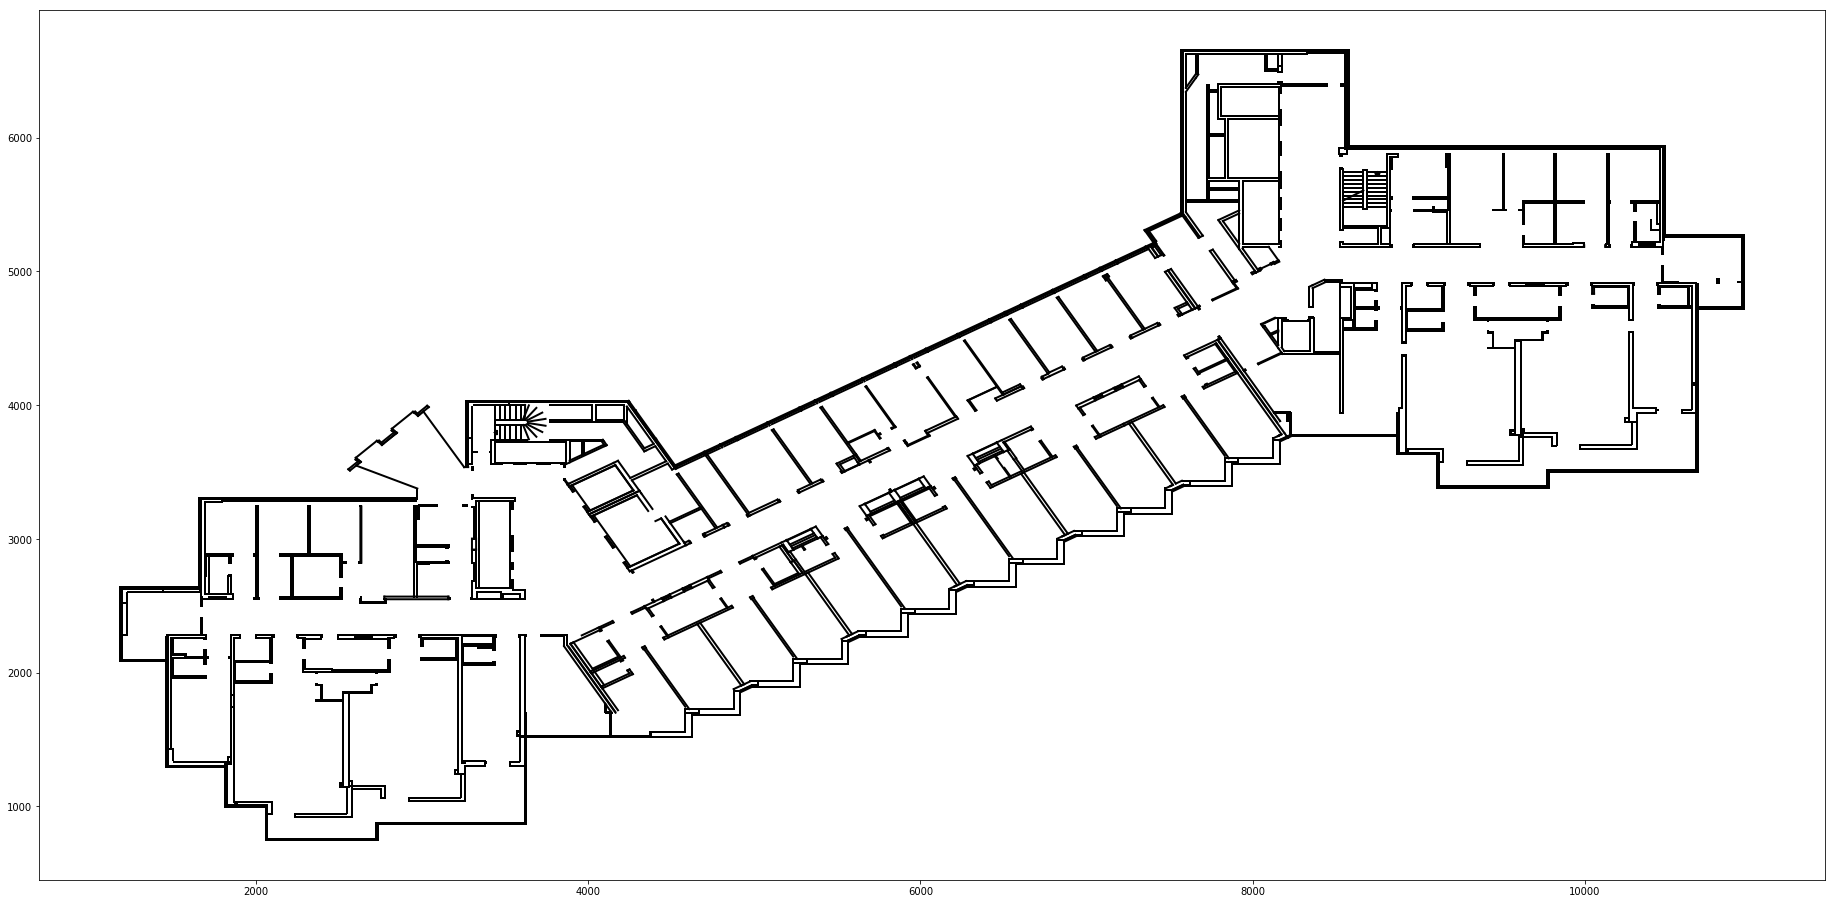

In [8]:
fig = plt.figure(figsize=(32,16))
plt.plot(line_x_coords, line_y_coords, linewidth=2, color='black')
plt.show()

In [5]:
floor_o_plot_labels = floor_o_labels[floor_o_labels["Label Type"] == "Room ID"] #floor_o_labels[~all_letters & ~room_name & ~room_size & ~single_character]
floor_o_plot_labels["Label Text"].to_list()

['128a',
 '128b',
 '127b',
 '127a',
 '126b',
 '126c',
 '128',
 '127',
 '126',
 '126a',
 '125a',
 '125',
 '124',
 '123a',
 '123b',
 '123',
 '122',
 '121',
 '120',
 '119',
 '118',
 '121a',
 '120b',
 '120a',
 '119a',
 '118a',
 '117a',
 '117',
 '116',
 '116a',
 '115',
 '115a',
 '113a',
 '114',
 '113',
 '112a',
 '112b',
 '112',
 '957',
 '111',
 '111a',
 '110b',
 '110a',
 '109b',
 '109a',
 '110',
 '109',
 '108c',
 '108b',
 '108a',
 '108',
 '107',
 '107a',
 '106',
 '105b',
 '105',
 '104',
 '103b',
 '105a',
 '104a',
 '103a',
 '103',
 '102a',
 '102',
 '901',
 '101',
 '900',
 '144a',
 '145',
 '956',
 '955',
 '954',
 '953',
 '952',
 '951',
 '950',
 '902',
 '146',
 '146a',
 '144',
 '143',
 '142',
 '141',
 '140',
 '139',
 '139a',
 '139b',
 '138',
 '137',
 '136',
 '135',
 '903',
 '904',
 '134',
 '906',
 '963',
 '962',
 '961',
 '960',
 '959',
 '958',
 '905',
 '964',
 '965',
 '966',
 '133a',
 '133',
 '967',
 '968',
 '132',
 '132a',
 '132b',
 '131',
 '130a',
 '130b',
 '130',
 '907',
 '129',
 '905a',
 '

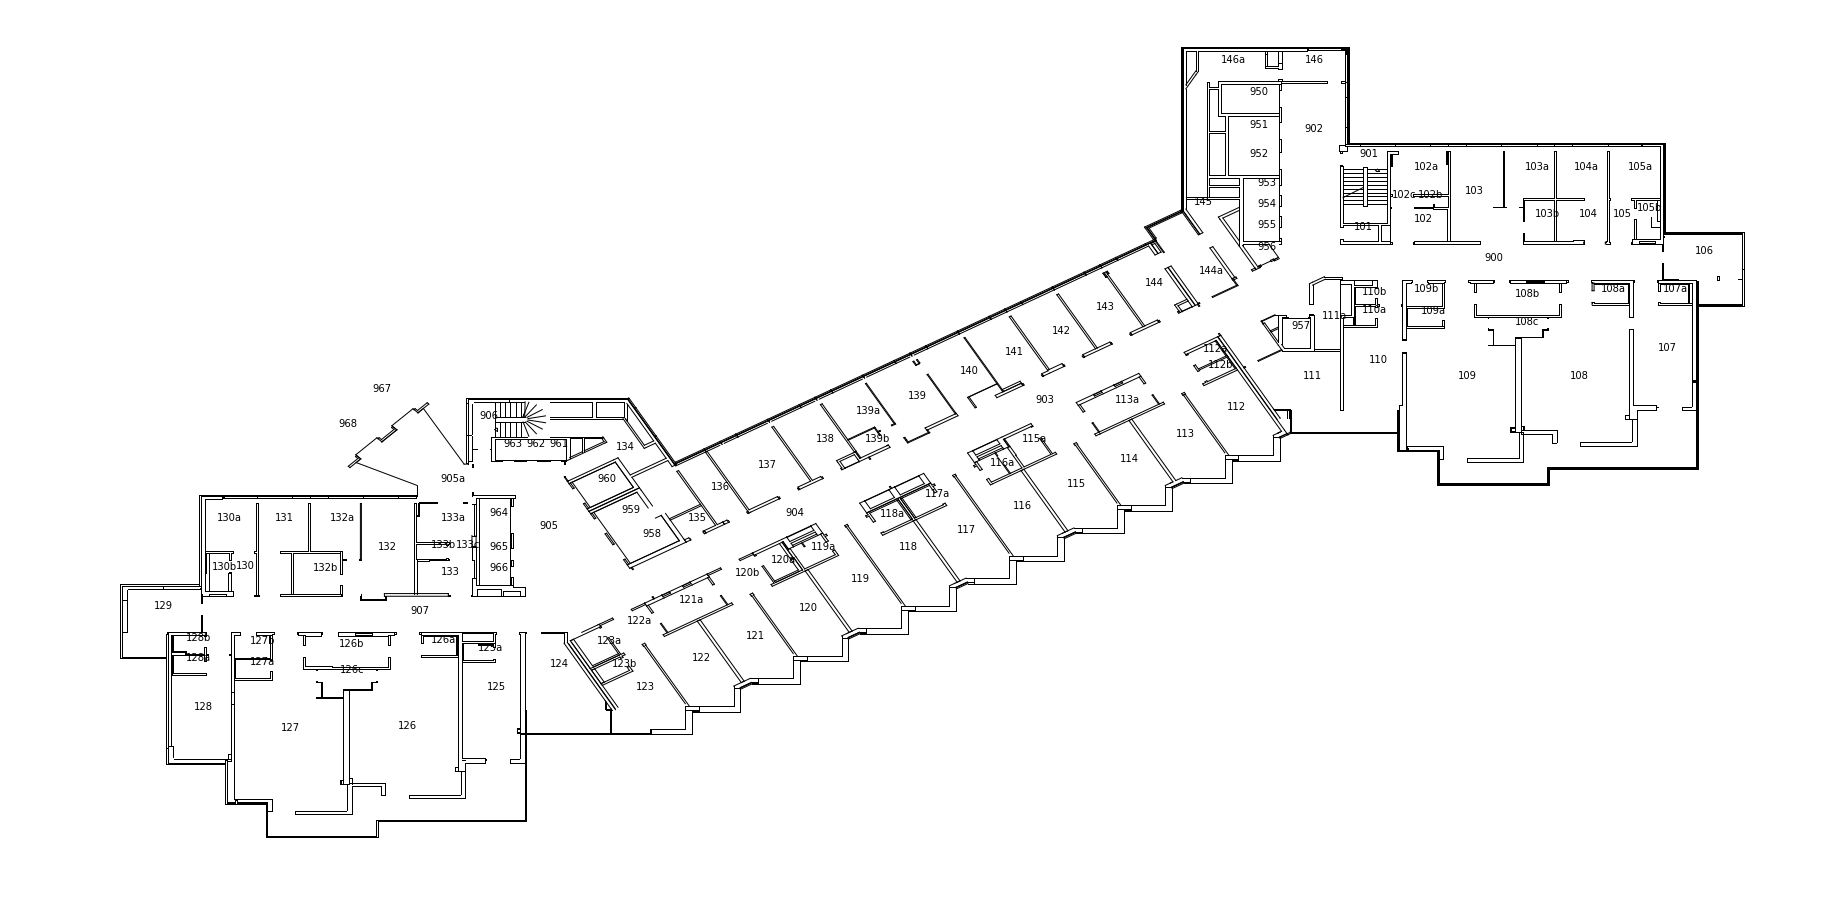

In [10]:
labels = floor_o_plot_labels["Label Text"].to_list()
label_x_coords = floor_o_plot_labels["X-coordinate"].to_numpy()
label_y_coords = floor_o_plot_labels["Y-coordinate"].to_numpy()

fig = plt.figure(figsize=(32,16))
plt.plot(line_x_coords, line_y_coords, linewidth=1, color='black')

for i, label in enumerate(labels):
    plt.annotate(label, (label_x_coords[i], label_y_coords[i]))
    
plt.axis("off")
plt.show()